In [5]:
import pandas as pd
df= pd.read_pickle('../../data/Performance Leaders/univ_cumulative_returns_100_20230915.pkl')
df=df.drop(columns ='DATE')
df

cum_ret UNIVERSE  \
DATE       lss_ticker                       
12/30/2022 SWPPX-US     0.000000    SWPPX   
           JLGMX-US     0.000000    JLGMX   
           DFQTX-US     0.000000    DFQTX   
           DFEOX-US     0.000000    DFEOX   
           DFIEX-US     0.000000    DFIEX   
...                          ...      ...   
09/01/2023 TRQZX-US    14.381718    TRQZX   
           MIDLX-US     7.512881    MIDLX   
           DURPX-US    15.144159    DURPX   
           FTHSX-US    11.455018    FTHSX   
           TRMIX-US    11.130728    TRMIX   

                                                               name   price  \
DATE       lss_ticker                                                         
12/30/2022 SWPPX-US                            Schwab Capital Trust   69.75   
           JLGMX-US                                JPMorgan Trust I   59.33   
           DFQTX-US                  DFA US Core Equity 2 Portfolio   30.80   
           DFEOX-US                  DFA US Core Equity 1 Portfolio   34.12   
           DFIEX-US         DFA International Core Equity Portfolio   14.63   
...                                                             ...     ...   
09/01/2023 TRQZX-US            Rowe T Price Mid Capital Growth Fund  101.58   
           MIDLX-US                              MFS Series Trust V   31.37   
           DURPX-US    DFA US High Relative Profitability Portfolio   19.53   
           FTHSX-US                            Capitol Series Trust   38.13   
           TRMIX-US                 Rowe T Price Mid-Cap Value Fund   31.29   

                                aum ffd_bmk_id        ffd_brand  \
DATE       lss_ticker                                             
12/30/2022 SWPPX-US    7.462342e+10       SP50           Schwab   
           JLGMX-US    4.126916e+10    R.1000G         JPMorgan   
           DFQTX-US    3.097797e+10     R.3000              DFA   
           DFEOX-US    3.047367e+10     R.3000              DFA   
           DFIEX-US    2.985577e+10     991000              DFA   
...                             ...        ...              ...   
09/01/2023 TRQZX-US    5.082423e+09     R.MIDG    T. Rowe Price   
           MIDLX-US    4.841225e+09   MS661687              MFS   
           DURPX-US    4.792612e+09     R.1000              DFA   
           FTHSX-US    4.779479e+09     R.2000  Fuller & Thaler   
           TRMIX-US    4.693800e+09     R.MIDV    T. Rowe Price   

                                 focus  \
DATE       lss_ticker                    
12/30/2022 SWPPX-US          Large Cap   
           JLGMX-US          Large Cap   
           DFQTX-US       Total Market   
           DFEOX-US       Total Market   
           DFIEX-US       Total Market   
...                                ...   
09/01/2023 TRQZX-US            Mid Cap   
           MIDLX-US    Extended Market   
           DURPX-US          Large Cap   
           FTHSX-US          Small Cap   
           TRMIX-US            Mid Cap   

                                                       segment        niche  \
DATE       lss_ticker                                                         
12/30/2022 SWPPX-US                 Equity: U.S.  -  Large Cap  Broad-based   
           JLGMX-US         Equity: Global  - Large Cap Growth       Growth   
           DFQTX-US              Equity: U.S.  -  Total Market  Broad-based   
           DFEOX-US              Equity: U.S.  -  Total Market  Broad-based   
           DFIEX-US    Equity: Global Ex-U.S.  -  Total Market  Broad-based   
...                                                        ...          ...   
09/01/2023 TRQZX-US              Equity: U.S. - Mid Cap Growth       Growth   
           MIDLX-US         Equity: Global  - Extended Market   Broad-based   
           DURPX-US                 Equity: U.S.  -  Large Cap  Broad-based   
           FTHSX-US                 Equity: U.S.  -  Small Cap  Broad-based   
           TRMIX-US             Equity: U.S.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [12]:
df = df.reset_index()
df['DATE'] = pd.to_datetime(df['DATE'])

<Axes: xlabel='DATE'>

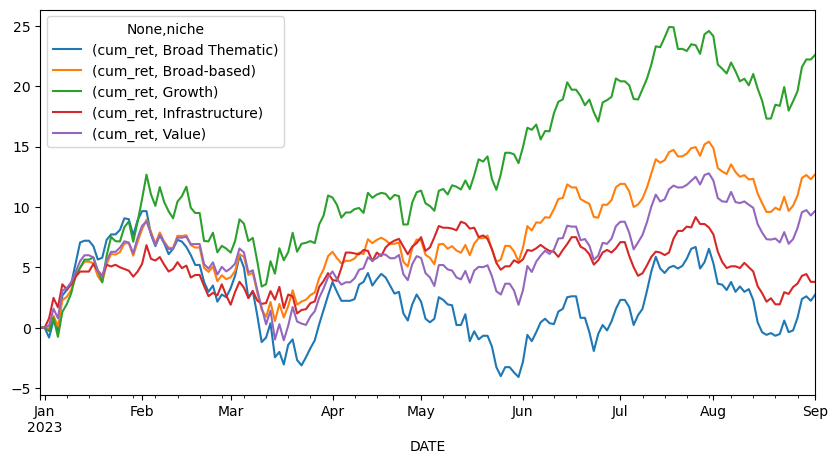

In [13]:
df.groupby(['DATE','niche']).agg({'cum_ret':'mean'}).unstack().plot(figsize = (10,5))

<Axes: xlabel='DATE'>

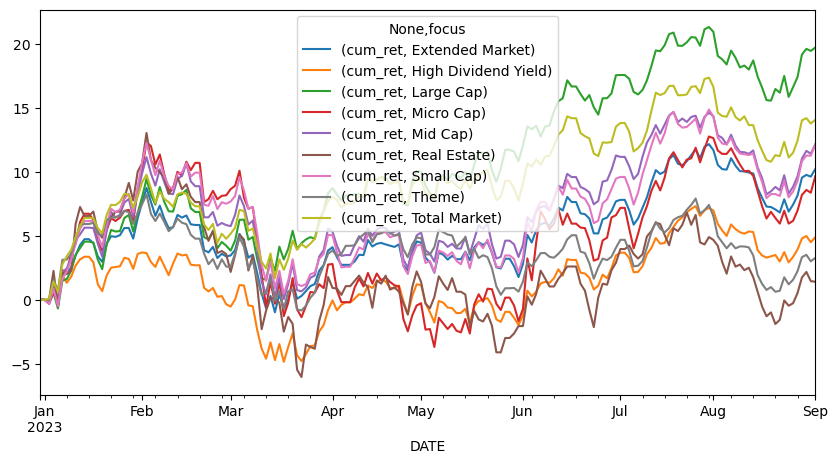

In [14]:
df.groupby(['DATE','focus']).agg({'cum_ret':'mean'}).unstack().plot(figsize = (10,5))

<Axes: xlabel='DATE'>

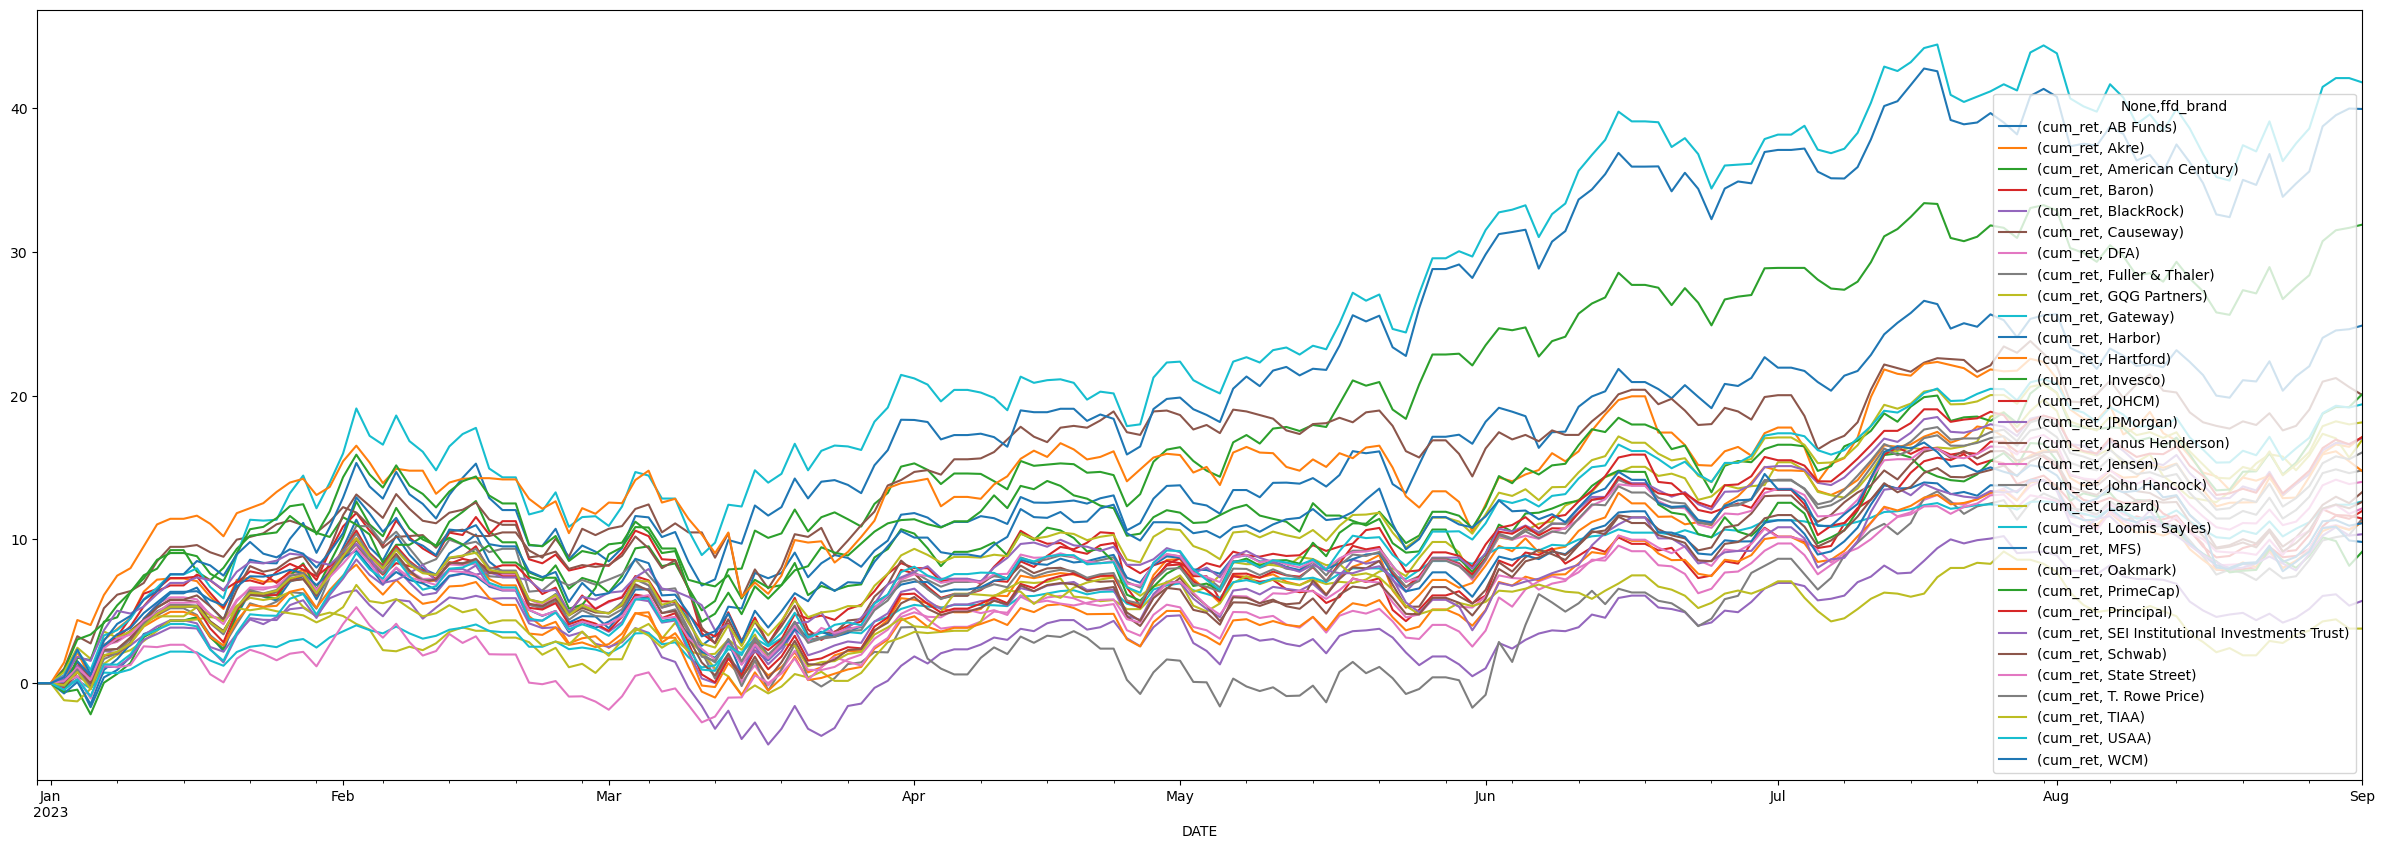

In [18]:
df.groupby(['DATE','ffd_brand']).agg({'cum_ret':'mean'}).unstack().plot(figsize = (30,10))

<Axes: xlabel='cum_ret', ylabel='niche'>

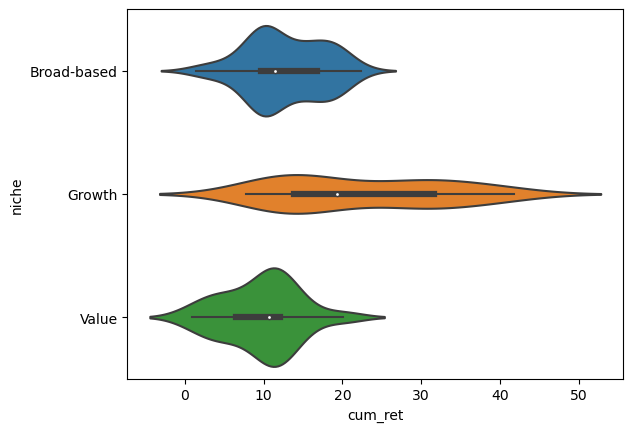

In [29]:
df_plot = df[df['DATE']=='2023-09-01']
df_t = df_plot.groupby('niche').agg({'cum_ret':'count'}).reset_index()
filt_list = list(df_t[df_t['cum_ret']>1]['niche'].unique())
sns.violinplot(data=df_plot[df_plot['niche'].isin(filt_list)],orient ='h',x='cum_ret',y='niche')

<Axes: xlabel='cum_ret', ylabel='focus'>

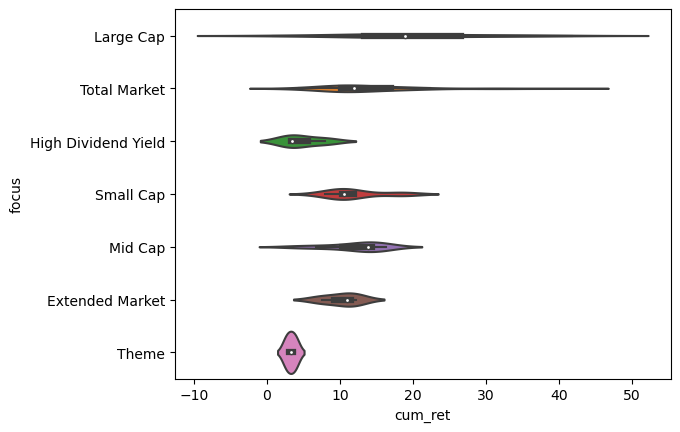

In [28]:
df_plot = df[df['DATE']=='2023-09-01']
df_t = df_plot.groupby('focus').agg({'cum_ret':'count'}).reset_index()
filt_list = list(df_t[df_t['cum_ret']>1]['focus'].unique())
sns.violinplot(data=df_plot[df_plot['focus'].isin(filt_list)],orient ='h',x='cum_ret',y='focus')

<Axes: xlabel='cum_ret', ylabel='ffd_brand'>

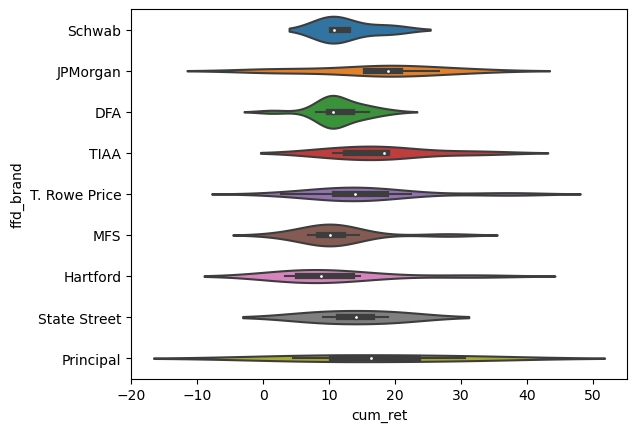

In [27]:
df_plot = df[df['DATE']=='2023-09-01']
df_t = df_plot.groupby('ffd_brand').agg({'cum_ret':'count'}).reset_index()
brand_list = list(df_t[df_t['cum_ret']>1]['ffd_brand'].unique())
sns.violinplot(data=df_plot[df_plot['ffd_brand'].isin(brand_list)],orient ='h',x='cum_ret',y='ffd_brand')